In [122]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

ALLOWED_NAMES = {
    k: v for k, v in np.__dict__.items() if not k.startswith("__")
}

def restriction1(n):
  """Restrição de n >= 0"""
  penalty = 10e12
  # n >= 1 => n - 1 >= 0 => -n + 1 <= 0
  function = "-n + 1.0"

  return penalty * (max([0, eval(function, {"__builtins__": {}, "n": n}, ALLOWED_NAMES)])**2)

def restriction2(r):
  """Restrição de v <= vc"""
  vc = 20.0
  penalty = 10e12
  g, m, kc, t = 9.8, 100.0, 10.5, 250.0

  function = "((g*m) / (kc * 2.0 * pi * (r**2.0))) * (1.0 - e**-(((kc * 2.0 * pi * (r**2.0)) / m) * t)) - vc"

  return penalty * (max([0, eval(function, {"__builtins__": {}, "r": r, "vc": vc, "g": g, "m": m, "kc": kc, "t": t}, ALLOWED_NAMES)])**2)

def f(function, constants, testValue, x, d):
  [x1, x2] = x
  [d1, d2] = d
  [c0, c1, c2] = constants

  # result = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2, "x": testValue, "d1": d1, "d2": d2, "c0": c0, "c1": c1, "c2": c2}, ALLOWED_NAMES) + restriction1(x1) + restriction2(x2)
  result = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2, "x": testValue, "d1": d1, "d2": d2, "c0": c0, "c1": c1, "c2": c2}, ALLOWED_NAMES) + restriction1(testValue)

  return result

def goldenSectionSearch(function, constants, interval, x, d):
  [a, b] = interval
  goldenRatio = (5**(1/2) - 1) / (2)
  e = 1e-6
  time = 0
  timeout = 100
  xa, xb = 0, 0

  while time < timeout:
    p = goldenRatio * (b - a)
    xa = a + p
    xb = b - p
    fxa = f(function, constants, xa, x, d)
    fxb = f(function, constants, xb, x, d)

    if math.fabs(xb - xa) < e:
      break

    if fxa >= fxb:
      b = xa
    elif fxb > fxa:
      a = xb

    time += 1
  print(f"Iterações Golden Section: {time}")
  return [xa, fxa]

In [123]:


def plot3D(function, constants, min, range=5):
    [c0, c1, c2] = constants
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2, "c0": c0, "c1": c1, "c2": c2}, ALLOWED_NAMES)

    ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='viridis', label=f'f(x) = {function}')
    
    ax.scatter(min[0], min[1], eval(function, {"__builtins__": {}, "x1": min[0], "x2": min[1], "c0": c0, "c1": c1, "c2": c2}, ALLOWED_NAMES), color='red', label=f'Mínimo')

def plotContour(function, constants, minimun, range=5):
    [c0, c1, c2] = constants
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2, "c0": c0, "c1": c1, "c2": c2}, ALLOWED_NAMES)

    # Contorno da função
    ax.contour(x1, x2, z, colors='blue')

    # Ponto de mínimo encontrado
    ax.scatter(minimun[0], minimun[1], color='red', label=f'Mínimo')

    plt.show()



Iteração 0==========================
Início: [1. 2.]
Iterações Golden Section: 33
Busca [1. 0.]: ponto ótimo: 1.0000012405588734 => novo ponto: [2.0000012405588734, 2.0]
Iterações Golden Section: 32
Busca [0. 1.]: ponto ótimo: 1.0000000207609592 => novo ponto: [2.0000012405588734, 3.000000020760959]
Iterações Golden Section: 32
Busca [0.7071072124498325,0.7071063499229997]: ponto ótimo: 1.0000007030683726 => novo ponto: [2.7071089501534233, 3.7071068678280694]

Iteração 1==========================
Início: [2.70710895 3.70710687]
Iterações Golden Section: 33
Busca [1. 0.]: ponto ótimo: 1.0000011919980656 => novo ponto: [3.707110142151489, 3.7071068678280694]
Iterações Golden Section: 32
Busca [0. 1.]: ponto ótimo: 1.000002203628901 => novo ponto: [3.707110142151489, 4.70710907145697]
Iterações Golden Section: 32
Busca [0.7071067503062622,0.7071068120668315]: ponto ótimo: 1.000001746301712 => novo ponto: [4.414218127279479, 5.414217118345638]

Iteração 2==========================
Início

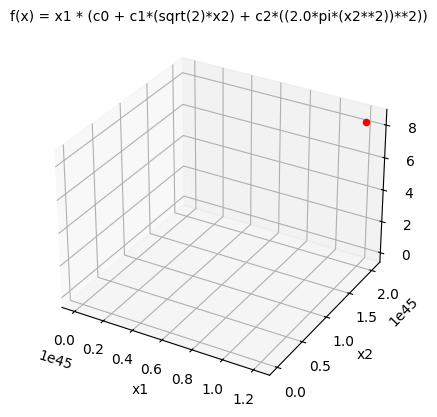

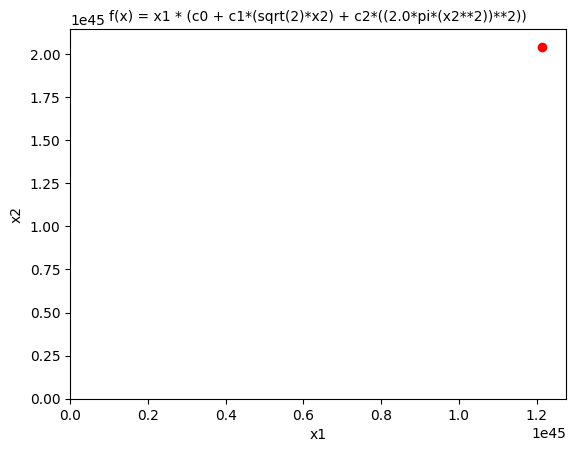

In [124]:
def hookeJeeves(function, initialValue, constants, dim):
    x1, x2 = initialValue[0], initialValue[1]
    nextValue = np.array(["(x1 + x*d1)", "(x2 + x*d2)"])
    nextFunc = function.replace("x1", nextValue[0]).replace("x2", nextValue[1])

    d = np.array(
        [[1.0,0.0], 
        [0.0,1.0]]
    )

    e = 1e-2
    k = 0
    timeout = 100
    time = 0
    searchInterval = [0, 0]
    end = np.array([0.0, 0.0])
    previousEnd = np.array([0.0, 0.0])
    
    while time < timeout:
        start = np.copy([x1, x2])
        
        print(f'\nIteração {time}==========================')
        print(f'Início: {start}')
        
        for k in range(dim):          
            d1, d2 = d[k][0], d[k][1]

            searchInterval = [-10.0 + x1 if k == 0 else -10.0 + x2, 10.0 + x1 if k == 1 else 10.0 + x2]

            [x, y] = goldenSectionSearch(nextFunc, constants, searchInterval, [x1, x2], [d1, d2])

            x1, x2 = eval(nextValue[0]), eval(nextValue[1])

            print(f'Busca {d[k]}: ponto ótimo: {x} => novo ponto: [{x1}, {x2}]')

            if k == dim-1:
                previousEnd = end
                end = np.array([x1, x2])

        if time == 0:
            result = end - start
        else:
            result = end - previousEnd

        if LA.norm(result) < e:
            break

        directionResult = result / LA.norm(result)
        
        d1, d2 = directionResult[0], directionResult[1]

        searchInterval = [-10.0 + x1 , 10.0 + x1]
        [x, y] = goldenSectionSearch(nextFunc, constants, searchInterval, [x1, x2], [d1, d2])

        x1, x2 = eval(nextValue[0]), eval(nextValue[1])

        print(f'Busca [{d1},{d2}]: ponto ótimo: {x} => novo ponto: [{x1}, {x2}]')

        time += 1

    return end



function = "x1 * (c0 + c1*(sqrt(2)*x2) + c2*((2.0*pi*(x2**2))**2))" #x1 equivale a n e x2 equivale a r
constants = [1.0, 1.0, 1.0]
initialValue = np.array([1.0, 2.0])

min = hookeJeeves(function, initialValue, constants, 2)

print(min)

plot3D(function, constants, min, 15)
plotContour(function, constants, min, 15)